In [16]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt

import hft.data_loader as dl
import hft.signal_utils as signal

logging.basicConfig(level=logging.INFO, format='%(asctime)s  %(name)s  %(levelname)s  %(message)s')

In [21]:
product = 'cu'  # switch between cu and zn
seconds = 10
return_col = 'return'+str(seconds)
return_cutoff = 6

In [ ]:
dates = dl.get_dates()
pxall = dl.load_active_contract_multiple_dates(product, dates)

In [11]:
# get signals on all dates
px = pxall.copy()
px = signal.signal_on_multiple_dates(px, signal.order_imbalance_ratio)
px = signal.signal_on_multiple_dates(px, signal.volume_order_imbalance)
px = signal.signal_on_multiple_dates(px, lambda x: signal.period_return(x, seconds))
px['bps_return'] = px[return_col] * 1e4

In [12]:
px[['volume_order_imbalance', 'order_imbalance_ratio', 'bps_return']].describe()

,volume_order_imbalance,order_imbalance_ratio,bps_return
count,637534.000000,637595.000000,566664.000000
mean,-0.102222,-0.003967,-0.007059
std,30.755697,0.551818,1.912727
min,-985.000000,-0.997923,-34.290193
25%,-7.000000,-0.456790,-0.963670
50%,0.000000,-0.007371,0.000000
75%,7.000000,0.445545,0.958773
max,848.000000,0.997608,36.640633


In [13]:
# ~50% of return does not change within 10 seconds
sum(px.bps_return == 0) / sum(~np.isnan(px.bps_return))

0.47826048593169851

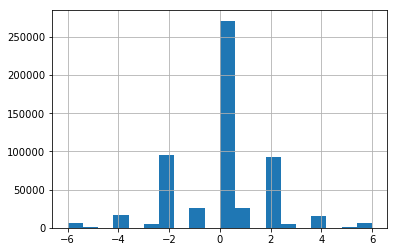

In [24]:
px.loc[np.abs(px.bps_return) > return_cutoff, 'bps_return'] =\
    np.sign(px.loc[np.abs(px.bps_return) > return_cutoff, 'bps_return']) * return_cutoff
px.bps_return.hist(bins=20)
plt.show()

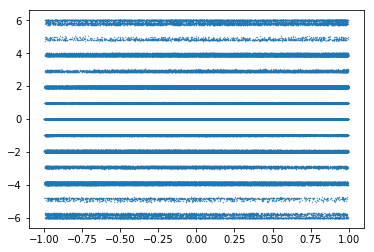

In [31]:
plt.scatter(px.order_imbalance_ratio, px.bps_return, marker='o', s=0.1)
plt.show()

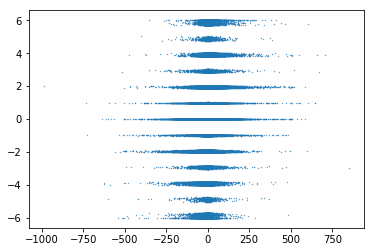

In [32]:
plt.scatter(px.volume_order_imbalance, px.bps_return, marker='o', s=0.1)
plt.show()